Таблица значений данной функции
1.414   0.100
2.828   0.300
5.657   0.500
11.314   0.700
22.627   0.900
45.255   1.100
90.510   1.300
181.019   1.500
362.039   1.700
724.077   1.900


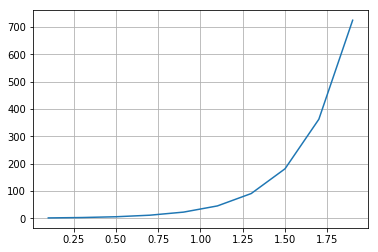

In [68]:
import math
from matplotlib import pylab as plt
%matplotlib inline

#функция
f = lambda x: 2**(5*x)

import numpy as np
x = np.linspace(0, 1.9, 100000)


GN = 10
x = [0 for k in range(GN)]
y = [0 for k in range(GN)]

ind = 0

for i in range(1,20,2):
    x[ind] = i/10
    ind+=1
for i in range(GN):
    y[i] = f(x[i])


#выводим таблицу значений
print("Таблица значений данной функции")
for i in range (GN):
    print( '%.3f' % y[i], ' ','%.3f' % x[i])
    
#plt.plot(x, f(x), label='f(x)')
plt.plot(x,y)
plt.grid(True)

Таблица значений Первой производной до интерполяции
4.142   0.100
7.071   0.300
14.142   0.500
28.284   0.700
56.569   0.900
113.137   1.100
226.274   1.300
452.548   1.500
905.097   1.700
1810.193   1.900


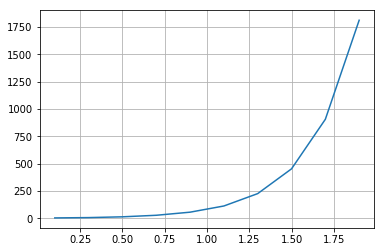

In [69]:
#Первая производная до интерполяции
df = []
df.append((y[0] - f(0)) / (x[0]))
for i in range(GN - 1):
    df.append((y[i+1] - y[i]) / (x[i+1] - x[i]))
print("Таблица значений Первой производной до интерполяции")
for i in range (GN):
    print( '%.3f' % df[i], ' ','%.3f' % x[i])
    
plt.plot(x,df)
plt.grid(True)
plt.show()

Таблица значений Второй производной до интерполяции
14.645   0.100
35.355   0.300
70.711   0.500
141.421   0.700
282.843   0.900
565.685   1.100
1131.371   1.300
2262.742   1.500
4525.483   1.700


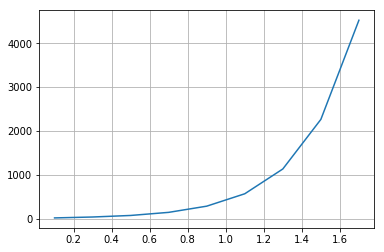

In [71]:
#Вторая производная до интерполяции
ddf = []
for i in range(GN-1):
    ddf.append((df[i+1] - df[i]) / (x[i+1] - x[i]))
print("Таблица значений Второй производной до интерполяции")
for i in range (GN-1):
    print( '%.3f' % ddf[i], ' ','%.3f' % x[i])
    
plt.plot(x[0:GN-1],ddf)
plt.grid(True)
plt.show()

In [72]:
def interp(x, y):
    X = x
    Y = y
    #сюда будем писать разделенные разности (пока заполним нулями)
    diffs = [[0 for i in range(GN)] for n in range(GN)]
    
    #первый столбец массива - значения y
    for i in range(GN):
        diffs[i][0] = y[i]
    
    #для осознания: первый порядок 
    #diffs[0][1] = (diffs[0][0] - diffs[0+1][0]) / (x[0] - x[0+1])
    #diffs[1][1] = (diffs[1][0] - diffs[1+1][0]) / (x[1] - x[1+1])
    #для осознания: второй порядок
    #diffs[0][2] = (diffs[0][1] - diffs[0+1][1]) / (x[0]-x[2])
    
    #все осознано. полный цикл:
    for n in range(1,GN):
        for i in range(GN-n):
            diffs[i][n] = (diffs[i][n-1] - diffs[i+1][n-1]) / (x[i] - x[i+n])
    
    #вывод массива
    #print("Разделенные разности")
    #for i in range (GN):
        #for n in range (GN):
            #print('%.3f' % diffs[i][n],end=" ")
        #print('')
    #сюда пишем дискретные значения аппроксимирующей функции (а для начала заполняем нулями)
    yINT = [0 for i in range(GN-1)]
    #точки x, в которых будем искать значения аппрох. функции (не должны быть равны данным x)
    r = (x[1] - x[0])/2
    xINT = [x[i]+r for i in range(GN-1)]
    
    #проход по точкам, в которых ищем знаение интерпол. функции
    p = 1
    s = 0
    for i in range(GN-1):
        #складываем все в сумму
        for j in range(1,GN):
            #считаем произведения
            for k in range(j):
                p *= (xINT[i] - x[k])
            #домножаем на y(x0,x1..xk)
            p *= diffs[0][j]
            s += p
            p = 1
        #не забываем про y0 (!!!)
        s += y[0]
        yINT[i] = s
        s = 0
    
    dataX = []
    dataY = []
    for i in range(GN):
        dataX.append(X[i])
        if i < len(xINT):
            dataX.append(xINT[i])
        dataY.append(Y[i])
        if i < len(xINT):
            dataY.append(yINT[i])
       
    #print(dataX)
    #print(dataY)
    return dataX, dataY

37


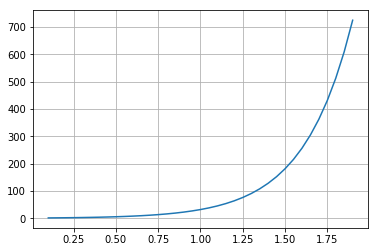

73


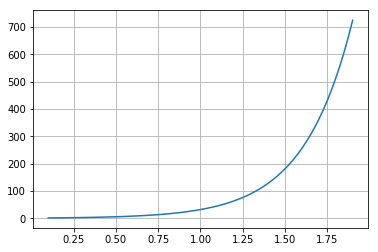

In [75]:
print(len(x))
plt.plot(x,y)
plt.grid(True)
plt.show()



#выводим таблицу значений
#print("Таблица значений данной функции")
#for i in range (GN):
    #print( '%.3f' % y[i], ' ','%.3f' % x[i])

x, y = interp(x,y)
GN = len(x)
print(len(y))
#print("Таблица значений данной функции")
#for i in range (GN):
    #print( '%.3f' % y[i], ' ','%.3f' % x[i])
plt.plot(x,y)
plt.grid(True)
plt.show()

Таблица значений Первой производной после интерполяции
4.142   0.100
5.379   0.125
5.675   0.150
6.081   0.175
6.580   0.200
7.160   0.225
7.815   0.250
8.542   0.275
9.338   0.300
10.205   0.325
11.148   0.350
12.172   0.375
13.284   0.400
14.492   0.425
15.806   0.450
17.236   0.475
18.793   0.500
20.489   0.525
22.339   0.550
24.357   0.575
26.558   0.600
28.960   0.625
31.579   0.650
34.437   0.675
37.554   0.700
40.954   0.725
44.663   0.750
48.707   0.775
53.117   0.800
57.926   0.825
63.170   0.850
68.888   0.875
75.123   0.900
81.922   0.925
89.335   0.950
97.420   0.975
106.236   1.000
115.849   1.025
126.333   1.050
137.767   1.075
150.235   1.100
163.833   1.125
178.661   1.150
194.833   1.175
212.468   1.200
231.700   1.225
252.673   1.250
275.543   1.275
300.483   1.300
327.680   1.325
357.337   1.350
389.677   1.375
424.943   1.400
463.401   1.425
505.338   1.450
551.070   1.475
600.942   1.500
655.328   1.525
714.639   1.550
779.321   1.575
849.861   1.600
926.791   1.62

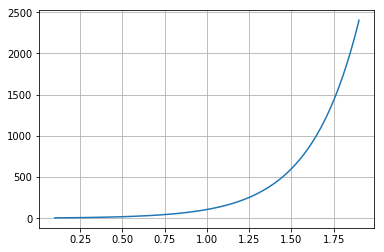

In [76]:
#Первая производная после интерполяции

df = []
df.append((y[0] - f(0)) / (x[0]))
for i in range(GN - 1):
    df.append((y[i+1] - y[i]) / (x[i+1] - x[i]))
print("Таблица значений Первой производной после интерполяции")
for i in range (GN):
    print( '%.3f' % df[i], ' ','%.3f' % x[i])
    
plt.plot(x,df)
plt.grid(True)
plt.show()

Таблица значений Второй производной после интерполяции
49.465   0.100
11.846   0.125
16.228   0.150
19.957   0.175
23.228   0.200
26.209   0.225
29.041   0.250
31.841   0.275
34.709   0.300
37.726   0.325
40.962   0.350
44.477   0.375
48.323   0.400
52.544   0.425
57.183   0.450
62.279   0.475
67.872   0.500
74.002   0.525
80.710   0.550
88.043   0.575
96.050   0.600
104.786   0.625
114.311   0.650
124.693   0.675
136.006   0.700
148.334   0.725
161.767   0.750
176.406   0.775
192.362   0.800
209.756   0.825
228.720   0.850
249.399   0.875
271.950   0.900
296.546   0.925
323.372   0.950
352.633   0.975
384.549   1.000
419.361   1.025
457.330   1.050
498.740   1.075
543.901   1.100
593.150   1.125
646.856   1.150
705.418   1.175
769.274   1.200
838.901   1.225
914.820   1.250
997.601   1.275
1087.863   1.300
1186.287   1.325
1293.613   1.350
1410.651   1.375
1538.286   1.400
1677.482   1.425
1829.295   1.450
1994.871   1.475
2175.465   1.500
2372.439   1.525
2587.280   1.550
2821.604   

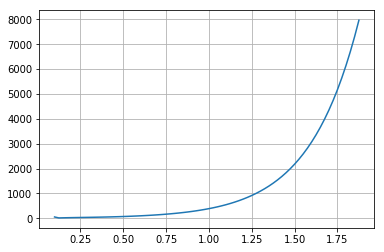

In [77]:
#Вторая производная после интерполяции

ddf = []
for i in range(GN-1):
    ddf.append((df[i+1] - df[i]) / (x[i+1] - x[i]))
print("Таблица значений Второй производной после интерполяции")
for i in range (GN-1):
    print( '%.3f' % ddf[i], ' ','%.3f' % x[i])
    
plt.plot(x[0:GN-1],ddf)
plt.grid(True)
plt.show()
